# 1. Environment Setup

## 1.1 Imports

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Plotting Function

In [2]:
def plot_transform(original_data, transformed_data, bins_original = 20, bins_transform = 20):
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    axes[0].hist(original_data, bins=bins_original, color='skyblue', edgecolor='darkblue', alpha=0.7)
    axes[1].hist(transformed_data, bins=bins_transform, color='skyblue', edgecolor='darkblue', alpha=0.7)

    axes[0].set_title('Original')
    axes[1].set_title('Transformed')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# 2. Shifting

In [3]:
# IGNORE: synthetic data creation
data_with_negative_tail = np.concatenate([
    np.random.normal(loc=50, scale=15, size=200),  # Main data
    np.random.uniform(-100, -50, 20)  # Negative tail
])

# Convert to DataFrame for easier handling
df_negative_tail = pd.DataFrame(data_with_negative_tail, columns=["Value"])

shifted_data = np.random.normal(loc=-1, scale=1, size=100) 

## 2.1 Feature Truncation

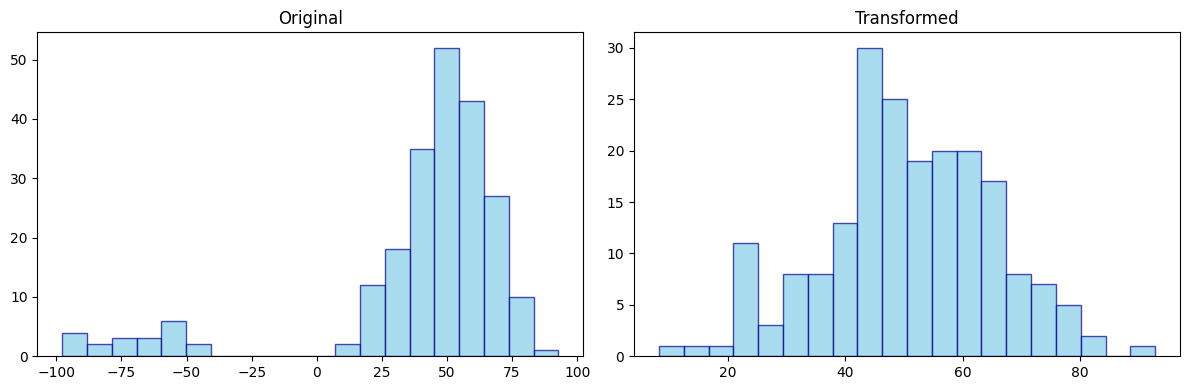

In [4]:
# Truncation: Limit the values to a specific range
truncation_min, truncation_max = 0, 100
df_truncated = df_negative_tail[(df_negative_tail >= truncation_min) & (df_negative_tail <= truncation_max)].copy()

plot_transform(df_negative_tail, df_truncated)

## 2.2 Affine Correction
**Equation**:
$ x' = a \cdot x + b $

Where:
- $ x $ is the original value.
- $ x' $ is the corrected (transformed) value.
- $ a $ is the scaling factor.
- $ b $ is the translation (offset) term.

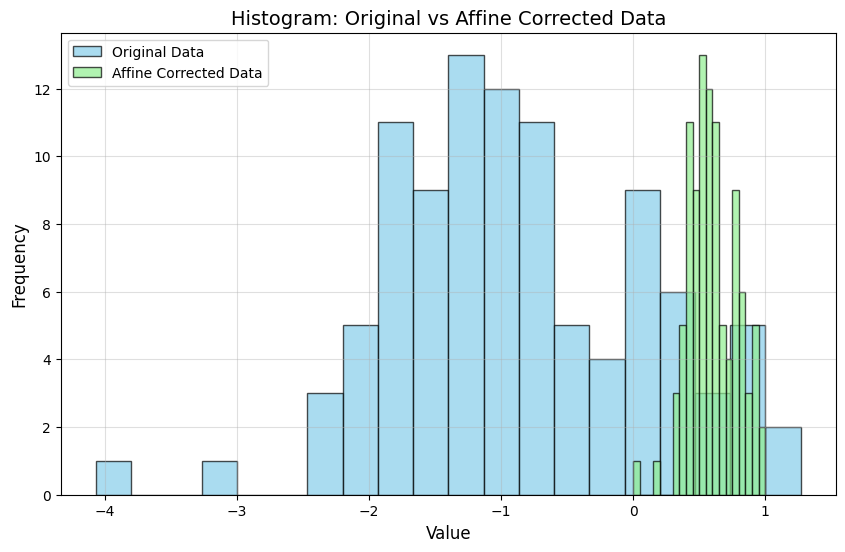

In [5]:
min_val = shifted_data.min()
max_val = shifted_data.max()
affine_transform = (shifted_data - min_val) / (max_val - min_val)

# Plot histogram for original and affine corrected data
plt.figure(figsize=(10, 6))

# Original data histogram
plt.hist(
    shifted_data,
    bins=20,
    alpha=0.7,
    label="Original Data",
    color="skyblue",
    edgecolor="k",
)

# Affine corrected data histogram
plt.hist(
    affine_transform,
    bins=20,
    alpha=0.7,
    label="Affine Corrected Data",
    color="lightgreen",
    edgecolor="k",
)

# Formatting
plt.title("Histogram: Original vs Affine Corrected Data", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)

plt.show()


# 3. Scaling

In [6]:
# IGNORE: synthetic data creation
data1 = np.random.uniform(200, 300, 100)  # Range: [0, 100]
data2 = np.random.uniform(500, 1000, 100)  # Range: [500, 1000]
data3 = np.random.uniform(-50, 50, 100)  # Range: [-50, 50]

# Combine the datasets into a DataFrame
original_data = pd.DataFrame({
    'Feature 1': data1,
    'Feature 2': data2,
    'Feature 3': data3
})

## 3.1 Standardizing

**Equation**:
- $ x' = \frac{x - \text{mean}(x)}{\text{std}(x)} $  

**Use Case**:
- Used when features have different units or scales and models are sensitive to magnitudes (e.g., SVM, k-NN).

**Edge Cases**:
  - Constant features (e.g., all values are the same): Results in division by zero during standardization or min-max scaling.  
  - Workaround: Replace the scaled value with 0 for standardization or a constant for min-max scaling.


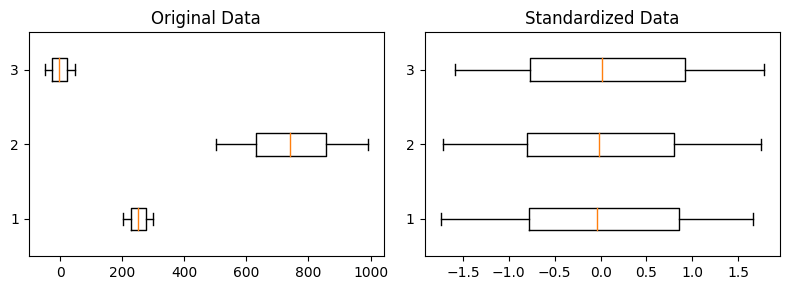

In [7]:
# Initialize Min-Max Scaler
scaler = StandardScaler()
standard_scaled_data = scaler.fit_transform(original_data)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns=original_data.columns)

# Combine the original and normalized data for comparison
comparison_sklearn = pd.concat([original_data.add_suffix(' (Original)'), standard_scaled_data.add_suffix(' (Normalized)')], axis=1)

# Plot the original and normalized data using scikit-learn normalization
plt.figure(figsize=(8, 3))

# Original data
plt.subplot(1, 2, 1)
plt.boxplot(original_data.values, vert=False)
plt.title("Original Data")

# Normalized data (scikit-learn)
plt.subplot(1, 2, 2)
plt.boxplot(standard_scaled_data.values, vert=False)
plt.title("Standardized Data")

plt.tight_layout()
plt.show()

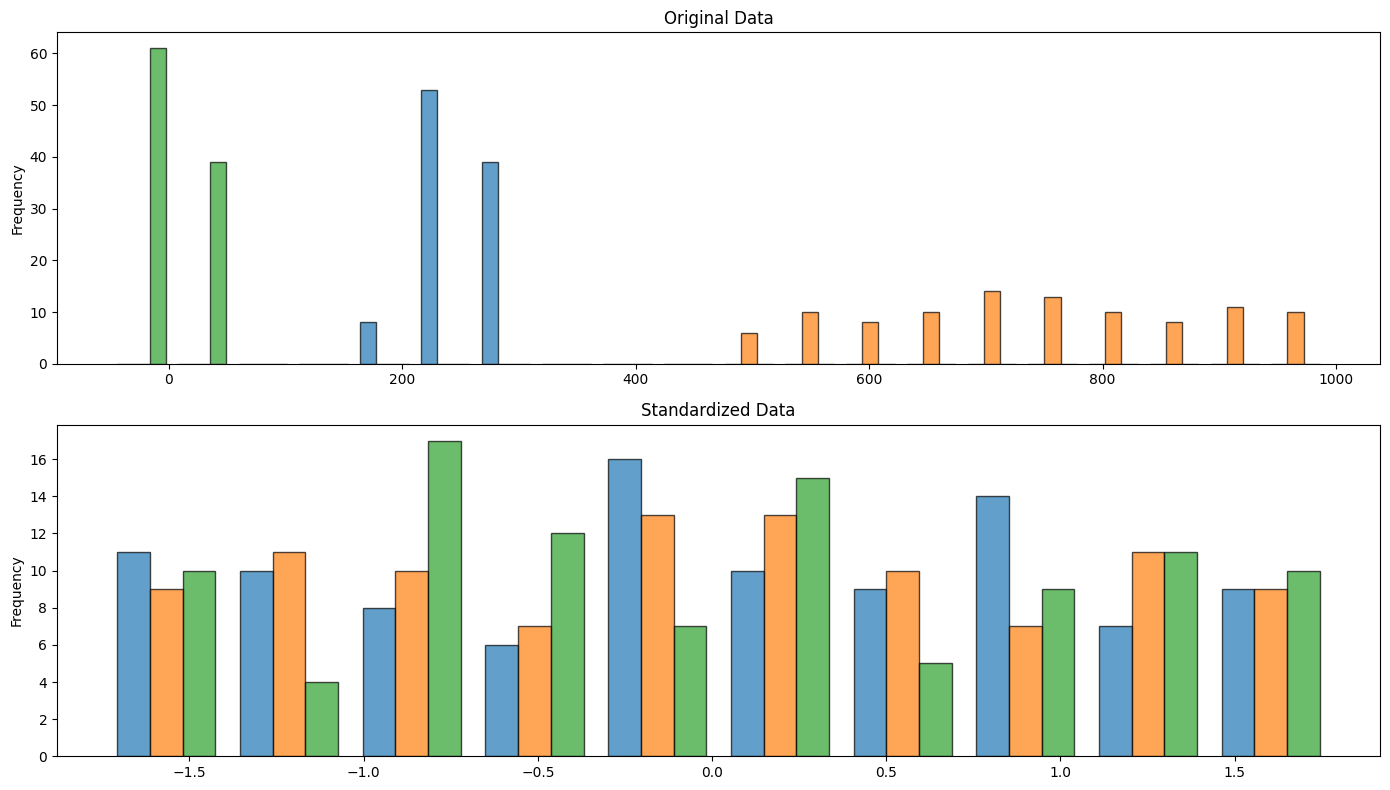

In [8]:
# Plot histograms to compare original and normalized data
plt.figure(figsize=(14, 8))

# Original data histograms
plt.subplot(2, 1, 1)
plt.hist(original_data.values, bins=20, label=original_data.columns, alpha=0.7, edgecolor='k')
plt.title("Original Data")
plt.ylabel("Frequency")

# Normalized data histograms
plt.subplot(2, 1, 2)
plt.hist(standard_scaled_data.values, bins=10, label=standard_scaled_data.columns, alpha=0.7, edgecolor='k')
plt.title("Standardized Data")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 3.2 Normalizing
**Equation**:
- $ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $

**Use Case**:
- Useful when features need to be constrained to a specific range, especially in neural networks or PCA.

**Edge Cases**:
- When features need to be constrained to a specific range (e.g., [0, 1]) or when using algorithms like Neural Networks or PCA.

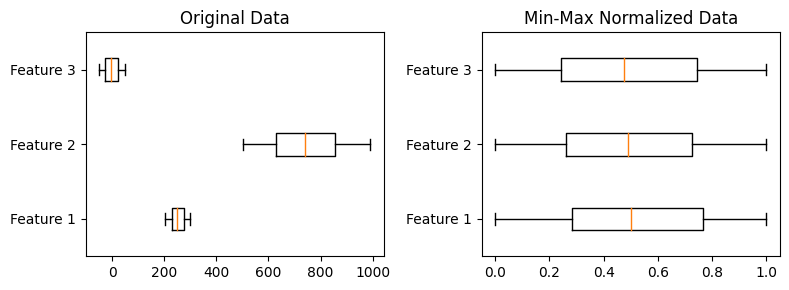

In [9]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()
minmax_scaled_data = scaler.fit_transform(original_data)
minmax_scaled_df = pd.DataFrame(minmax_scaled_data, columns=original_data.columns)

# Combine the original and normalized data for comparison
comparison_sklearn = pd.concat([original_data.add_suffix(' (Original)'), minmax_scaled_df.add_suffix(' (Normalized)')], axis=1)

# Plot the original and normalized data using scikit-learn normalization
plt.figure(figsize=(8, 3))

# Original data
plt.subplot(1, 2, 1)
plt.boxplot(original_data.values, vert=False, labels=original_data.columns)
plt.title("Original Data")

# Normalized data (scikit-learn)
plt.subplot(1, 2, 2)
plt.boxplot(minmax_scaled_df.values, vert=False, labels=minmax_scaled_df.columns)
plt.title("Min-Max Normalized Data")
plt.tight_layout()
plt.show()


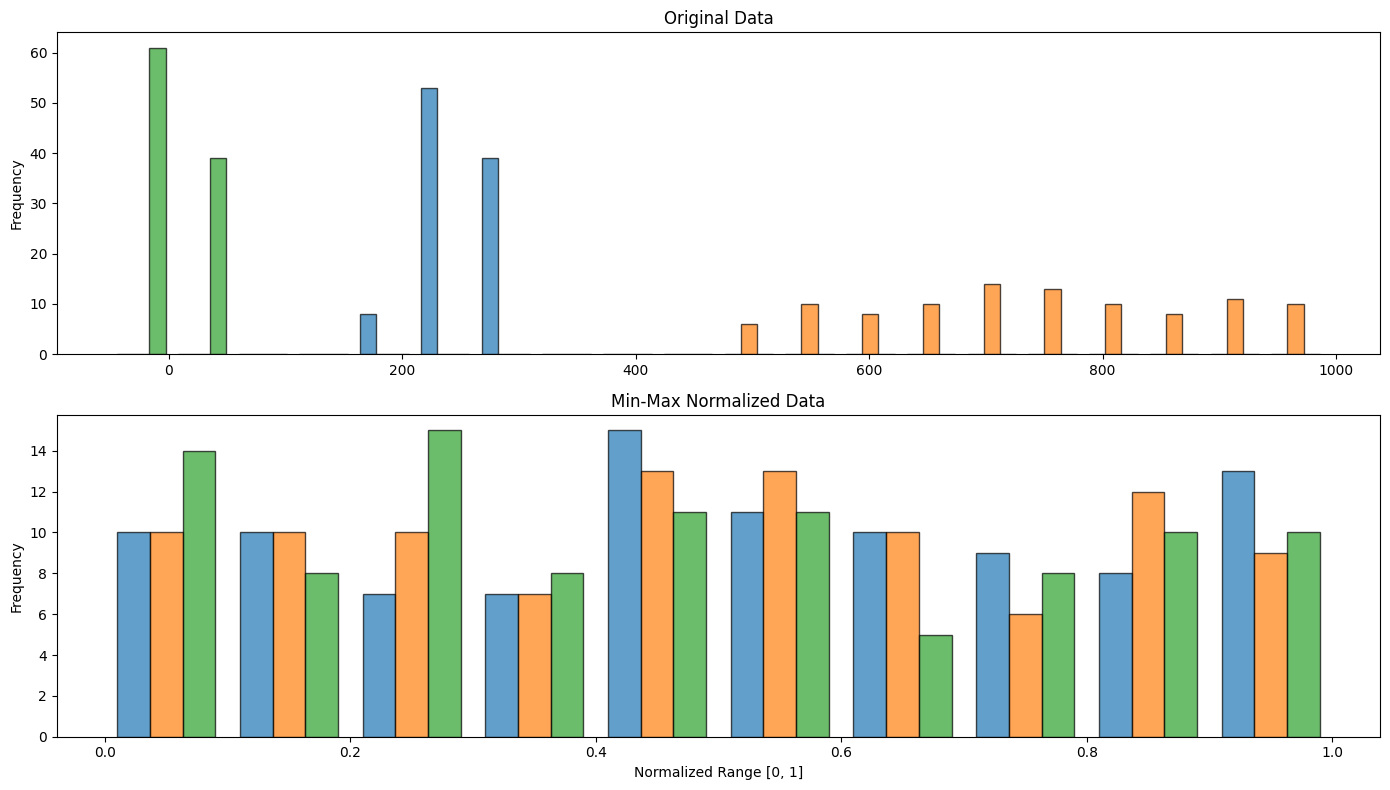

In [10]:
# Plot histograms to compare original and normalized data
plt.figure(figsize=(14, 8))

# Original data histograms
plt.subplot(2, 1, 1)
plt.hist(original_data.values, bins=20, label=original_data.columns, alpha=0.7, edgecolor='k')
plt.title("Original Data")
plt.ylabel("Frequency")

# Normalized data histograms
plt.subplot(2, 1, 2)
plt.hist(minmax_scaled_df.values, bins=10, label=minmax_scaled_df.columns, alpha=0.7, edgecolor='k')
plt.title("Min-Max Normalized Data")
plt.xlabel("Normalized Range [0, 1]")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# 4. Transformations

In [11]:
# IGNORE: synthetic data creation
exponential_data = np.random.exponential(scale=10, size=1000) 
uniform_data = np.random.uniform(0, 100, 50)
normal_data = np.random.normal(loc=0, scale=1, size=100)

## 4.1 Binary Transformation
*also called  one-hot encoding*

**Equation**:
For a given threshold $ t $, convert values to binary:
$ x' =
\begin{cases} 
1, & x \geq t \\
0, & x < t
\end{cases} $

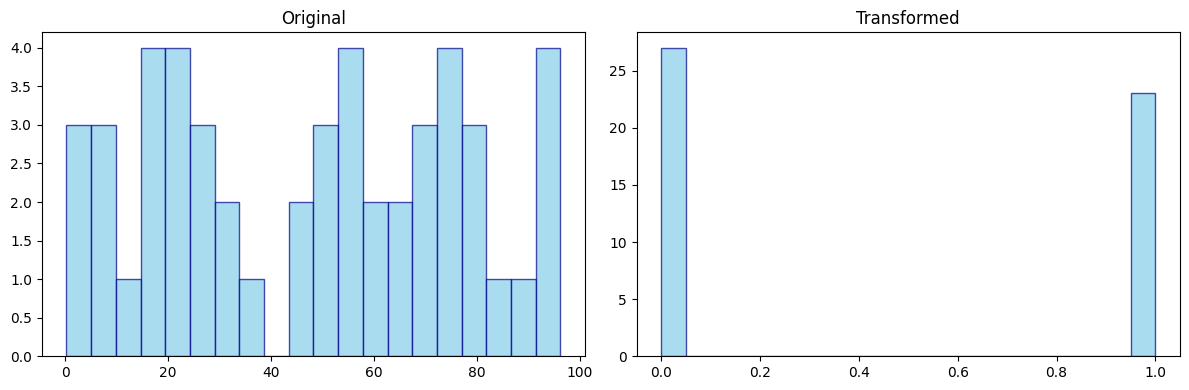

In [12]:
threshold = 50
binary_transform = np.where(uniform_data > threshold, 0, 1)
plot_transform(uniform_data, binary_transform)

## 4.2 K-Bins Discretization
**Equation**: 
- Divide the range of values into $ k $ bins: $ x' = \text{bin}(x, k) $ 
- Where $\text{bin}(x, k)$ maps $x$ to one of the $k$ discrete intervals.


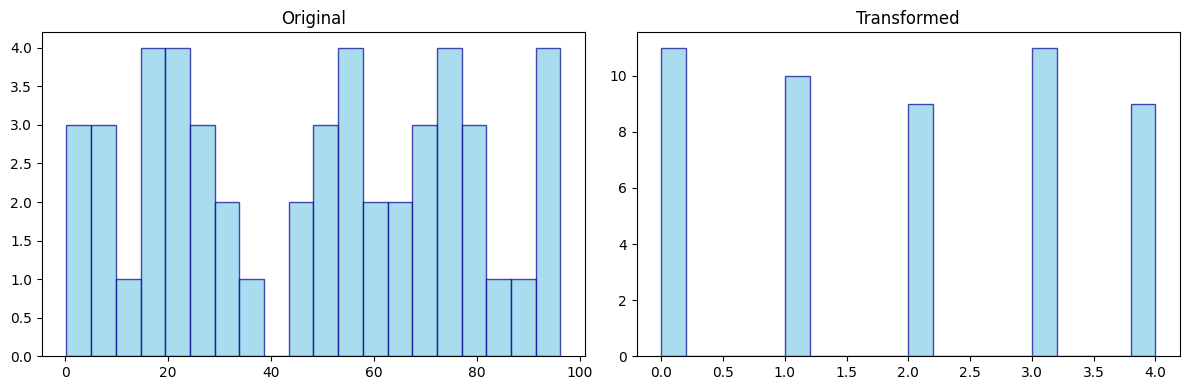

In [16]:
from sklearn.preprocessing import KBinsDiscretizer

k_bins = 5
discriminator = KBinsDiscretizer(n_bins=k_bins, encode='ordinal', strategy='uniform', subsample=None)
k_bins_transformed = discriminator.fit_transform(uniform_data.reshape(-1,1))
plot_transform(uniform_data, k_bins_transformed)

## 4.3 Gaussian Anamorphosis
**Equation**:
- $x' = \Phi^{-1}(\text{CDF}(x))$

Where:
- $\Phi^{-1}$: Inverse of the standard normal CDF.
- $\text{CDF}(x)$: Cumulative distribution function of the data.


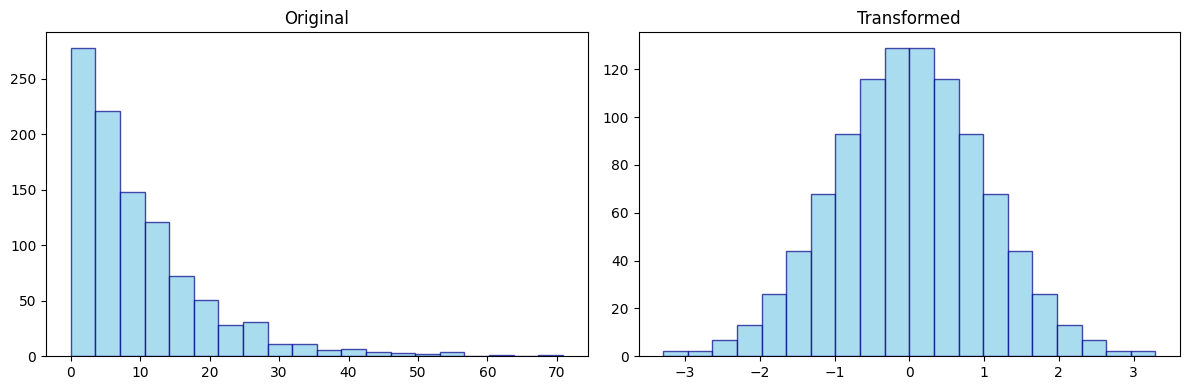

In [17]:
from scipy.stats import norm, rankdata
gaussian_data = norm.ppf(
    (rankdata(exponential_data, method="average") - 0.5) / len(exponential_data)
)
plot_transform(exponential_data, gaussian_data)

## 4.4 Uniform Transformation
**Equation**: 
- $ x' = \text{CDF}(x) $

Where:
- $\text{CDF}(x)$: Cumulative distribution function of the data.


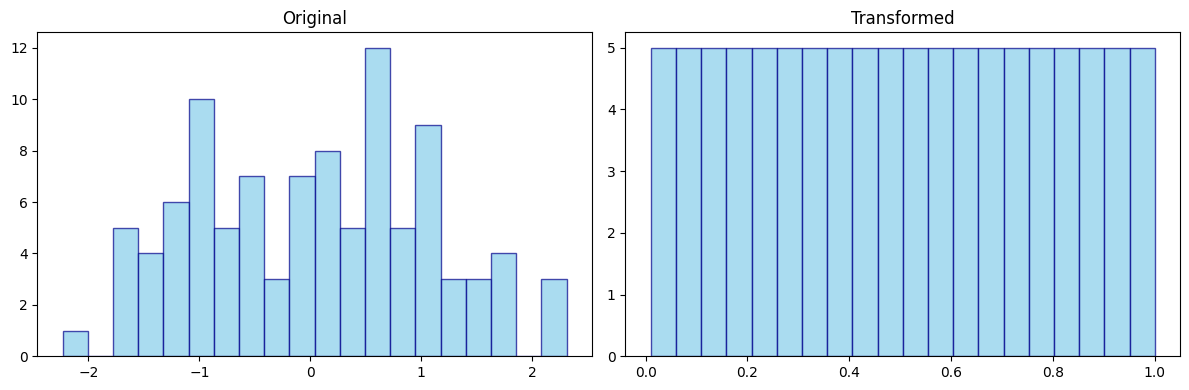

In [18]:
from scipy.stats import rankdata
uniform_transformed = rankdata(normal_data, method="average") / len(normal_data)
plot_transform(normal_data, uniform_transformed)

## 4.5 Log
**Equation**: 
- $ x' = \log(x + \epsilon) $
- *Backward Transformation*: $x = e^{x'} - \epsilon$
  
**Use Cases**:
- Data with a right-skewed distribution.
- Reducing the range of large values, such as income or population.

**Edge Cases**:
- Negative or zero values ($x \leq 0$): Logarithm is undefined.  
- *Workaround*: Shift data by adding a constant $\epsilon$ such that $x + \epsilon > 0$.


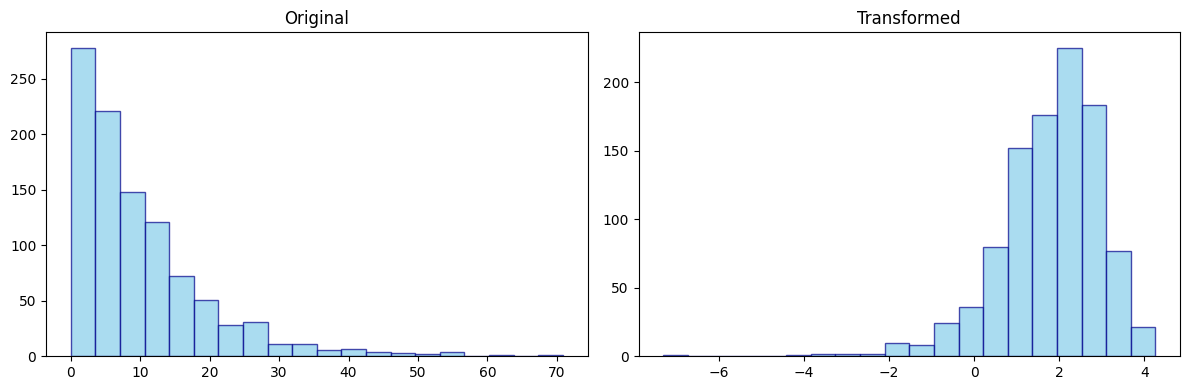

In [19]:
log_original_data = exponential_data
log_transformed_data = (np.log(log_original_data))

plot_transform(exponential_data, log_transformed_data)

## 4.6 Square Root
**Equation**: 
- $ x' = \sqrt{x} $
- *Backward Transformation*: $ x= (x')^2$

**Use Cases**:
- Reducing the range of data while preserving relative relationships.
- Addressing moderate skewness, often used for count data or non-negative values.

**Edge Cases**:
- Negative values ($x < 0$): Square root is undefined.  
- *Workaround*: Shift data by adding a constant to ensure all values are non-negative ($x + \epsilon \geq 0$).



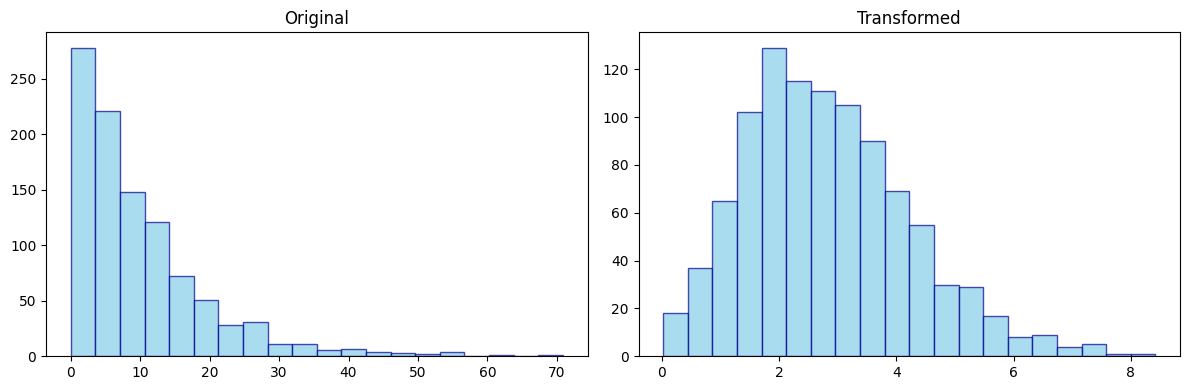

In [20]:
sqrt_transformed_data = (np.sqrt(exponential_data))
plot_transform(exponential_data, sqrt_transformed_data)

## 4.7 Box-Cox

**Equation** :
- $x' = \begin{cases} 
  \frac{x^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
  \log(x), & \text{if } \lambda = 0
  \end{cases} $
- *Backward Transformation*: $ x = \begin{cases} 
  (x' \cdot \lambda + 1)^{1/\lambda}, & \text{if } \lambda \neq 0 \\
  e^{x'}, & \text{if } \lambda = 0
  \end{cases}$

**Use Cases**:
- Normalizing data to approximate a Gaussian distribution.
- Handling heteroscedasticity in regression models.
- Works only for positive-valued data.

**Edge Cases**:
- Negative or zero values ($x \leq 0$): Box-Cox requires strictly positive values.  
- *Workaround*: Add a constant $\epsilon > 0$ to shift the data ($x + \epsilon$) before applying the transformation.


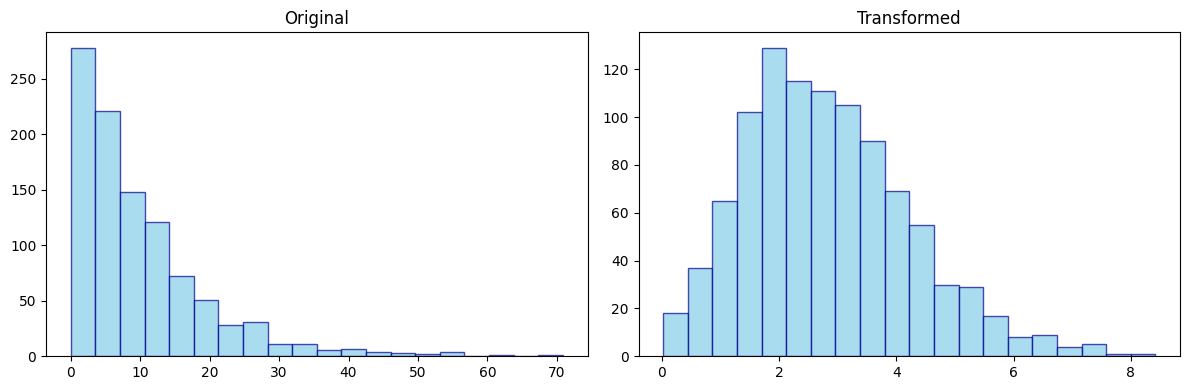

In [21]:
boxcox_transformed_data = (np.sqrt(exponential_data))

plot_transform(exponential_data, boxcox_transformed_data)

# 5. Outlier Removal

## 5.1 Z-Score

**Equation**:
$z = \frac{x - \mu}{\sigma} $
- $z$: Z-score (normalized value)  
- $x$: Original value  
- $\mu$: Mean of the dataset  
- $\sigma$: Standard deviation of the dataset  

Data points are typically considered outliers if their Z-score falls outside a chosen threshold (e.g., $|Z| > 3$).

## 5.2 IQR
**Equation**: $\text{IQR} = Q3 - Q1$
Outlier thresholds are calculated as:  
- Lower Bound: $ \text{Lower Bound} = Q1 - 1.5 \cdot \text{IQR} $
  - $Q1$: 25th percentile (first quartile).  
- Upper Bound: $\text{Upper Bound} = Q3 + 1.5 \cdot \text{IQR} $
  - $Q3$: 75th percentile (third quartile).  

Data points falling outside these bounds are considered outliers.


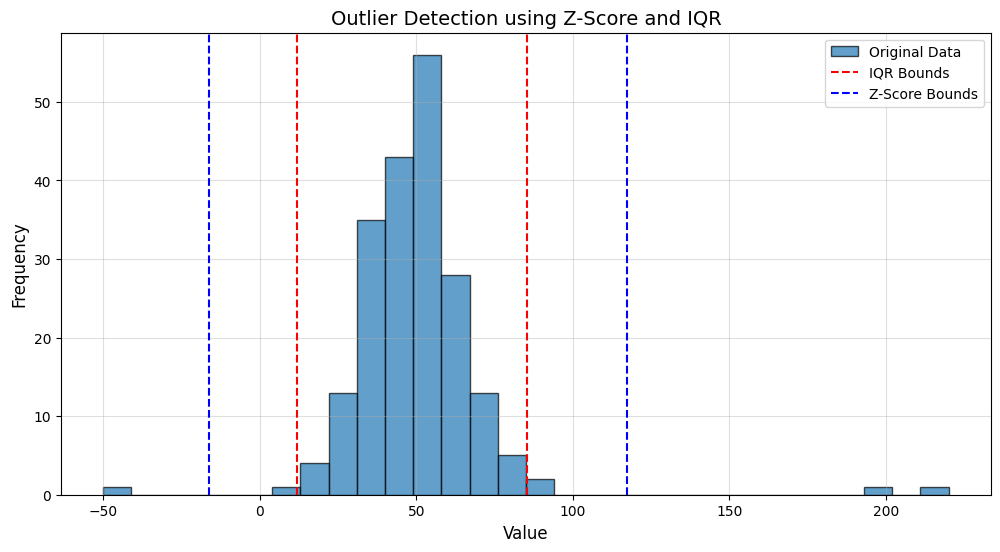

In [22]:
from statistics import mean
from scipy.stats import zscore

# Generate synthetic data
np.random.seed(42)
data = np.random.normal(loc=50, scale=15, size=200)  # Normally distributed data
data = np.append(data, [200, 220, -50])  # Add extreme outliers

# Convert data to a DataFrame for easier handling
df = pd.DataFrame(data, columns=["Value"])
# Apply Z-Score using scipy
mean = df["Value"].mean()
std = df["Value"].std()
df["Z-Score (Scipy)"] = zscore(df["Value"])
z_threshold = 3
z_outliers_scipy = df[np.abs(df["Z-Score (Scipy)"]) > z_threshold]

# Apply IQR using feature-engine
q1 = df["Value"].quantile(0.25)
q3 = df["Value"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Add IQR outlier detection results
df["IQR Outlier"] = (df["Value"] < lower_bound) | (df["Value"] > upper_bound)

# Create a summary of outliers detected
outlier_summary_with_packages = {
    "Method": ["Z-Score (Scipy)", "IQR (Feature-Engine)"],
    "Number of Outliers": [len(z_outliers_scipy), df["IQR Outlier"].sum()],
    "Outlier Values (First 5)": [
        z_outliers_scipy["Value"].head().tolist(),
        df[df["IQR Outlier"]]["Value"].head().tolist()
    ],
}

outlier_summary_with_packages_df = pd.DataFrame(outlier_summary_with_packages)

# Visualization
plt.figure(figsize=(12, 6))

# Original data histogram
plt.hist(df["Value"], bins=30, alpha=0.7, edgecolor='k', label="Original Data")
plt.axvline(lower_bound, color='red', linestyle="--", label="IQR Bounds")

plt.axvline(upper_bound, color='red', linestyle="--")
plt.axvline(mean + z_threshold * std, color='blue', linestyle="--", label="Z-Score Bounds")
plt.axvline(mean - z_threshold * std, color='blue', linestyle="--")

# Formatting
plt.title("Outlier Detection using Z-Score and IQR", fontsize=14)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(alpha=0.4)

plt.show()